**POZNÁMKA: Tento notebook je určený pre platformu Google Colab. Je však možné ho spustiť (možno s drobnými úpravami) aj ako štandardný Jupyter notebook.** 



In [ ]:
#@title -- Installation of Packages -- { display-mode: "form" }
import sys
!{sys.executable} -m pip install git+https://github.com/michalgregor/class_utils.git

In [ ]:
#@title -- Import of Necessary Packages -- { display-mode: "form" }
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [ ]:
#@title -- Downloading Data -- { display-mode: "form" }
from class_utils.download import download_file_maybe_extract
download_file_maybe_extract("https://www.dropbox.com/s/u8u7vcwy3sosbar/titanic.zip?dl=1", directory="data/titanic")

# also create a directory for storing any outputs
import os
os.makedirs("output", exist_ok=True)

## Logistická regresia

Doteraz sme sa venovali regresným úlohám. Čo ak chceme namiesto regresie vykonať klasifikáciu? Ako prvý príklad si ukážeme tzv. logistickú regresiu, ktorá sa používa na binárnu klasifikáciu (t.j. rozdelenie do dvoch tried). Názov logistická regresia je dosť mätúci, keďže ide v skutočnosti o klasifikačnú metódu, ale také sa zaužívalo názvoslovie.

Model má v prípade logistickej regresie nasledujúci tvar:
\begin{equation}
\hat y = \sigma(\mathbf{x} \mathbf{a}).
\end{equation}

Ide teda o analogický tvar ako v prípade lineárnej regresie, ibaže na výstup sa ešte aplikuje tzv. logistická (alebo sigmoidná) funkcia $\sigma(u)$, ktorej definícia je nasledujúca:
\begin{equation}
\sigma(u)=\frac{1}{1+e^{-u}}.
\end{equation}

Jej obor hodnôt je $(0, 1)$, výstup je teda možné interpretovať ako pravdepodobnosť $p(c_0)$ triedy 0. Pravdepodobnosť triedy 1 bude doplnok ku jednotke, t.j. $p(c_1) = 1 - p(c_0)$.

Výstup klasifikátora sa teda dá určiť nasledovne:

* Ak $\hat y > 0.5$ klasifikujeme vstup ako triedu 1.
* Inak ako triedu 0.
Ilustrácia logistickej funkcie a rozhodovacej hranice:



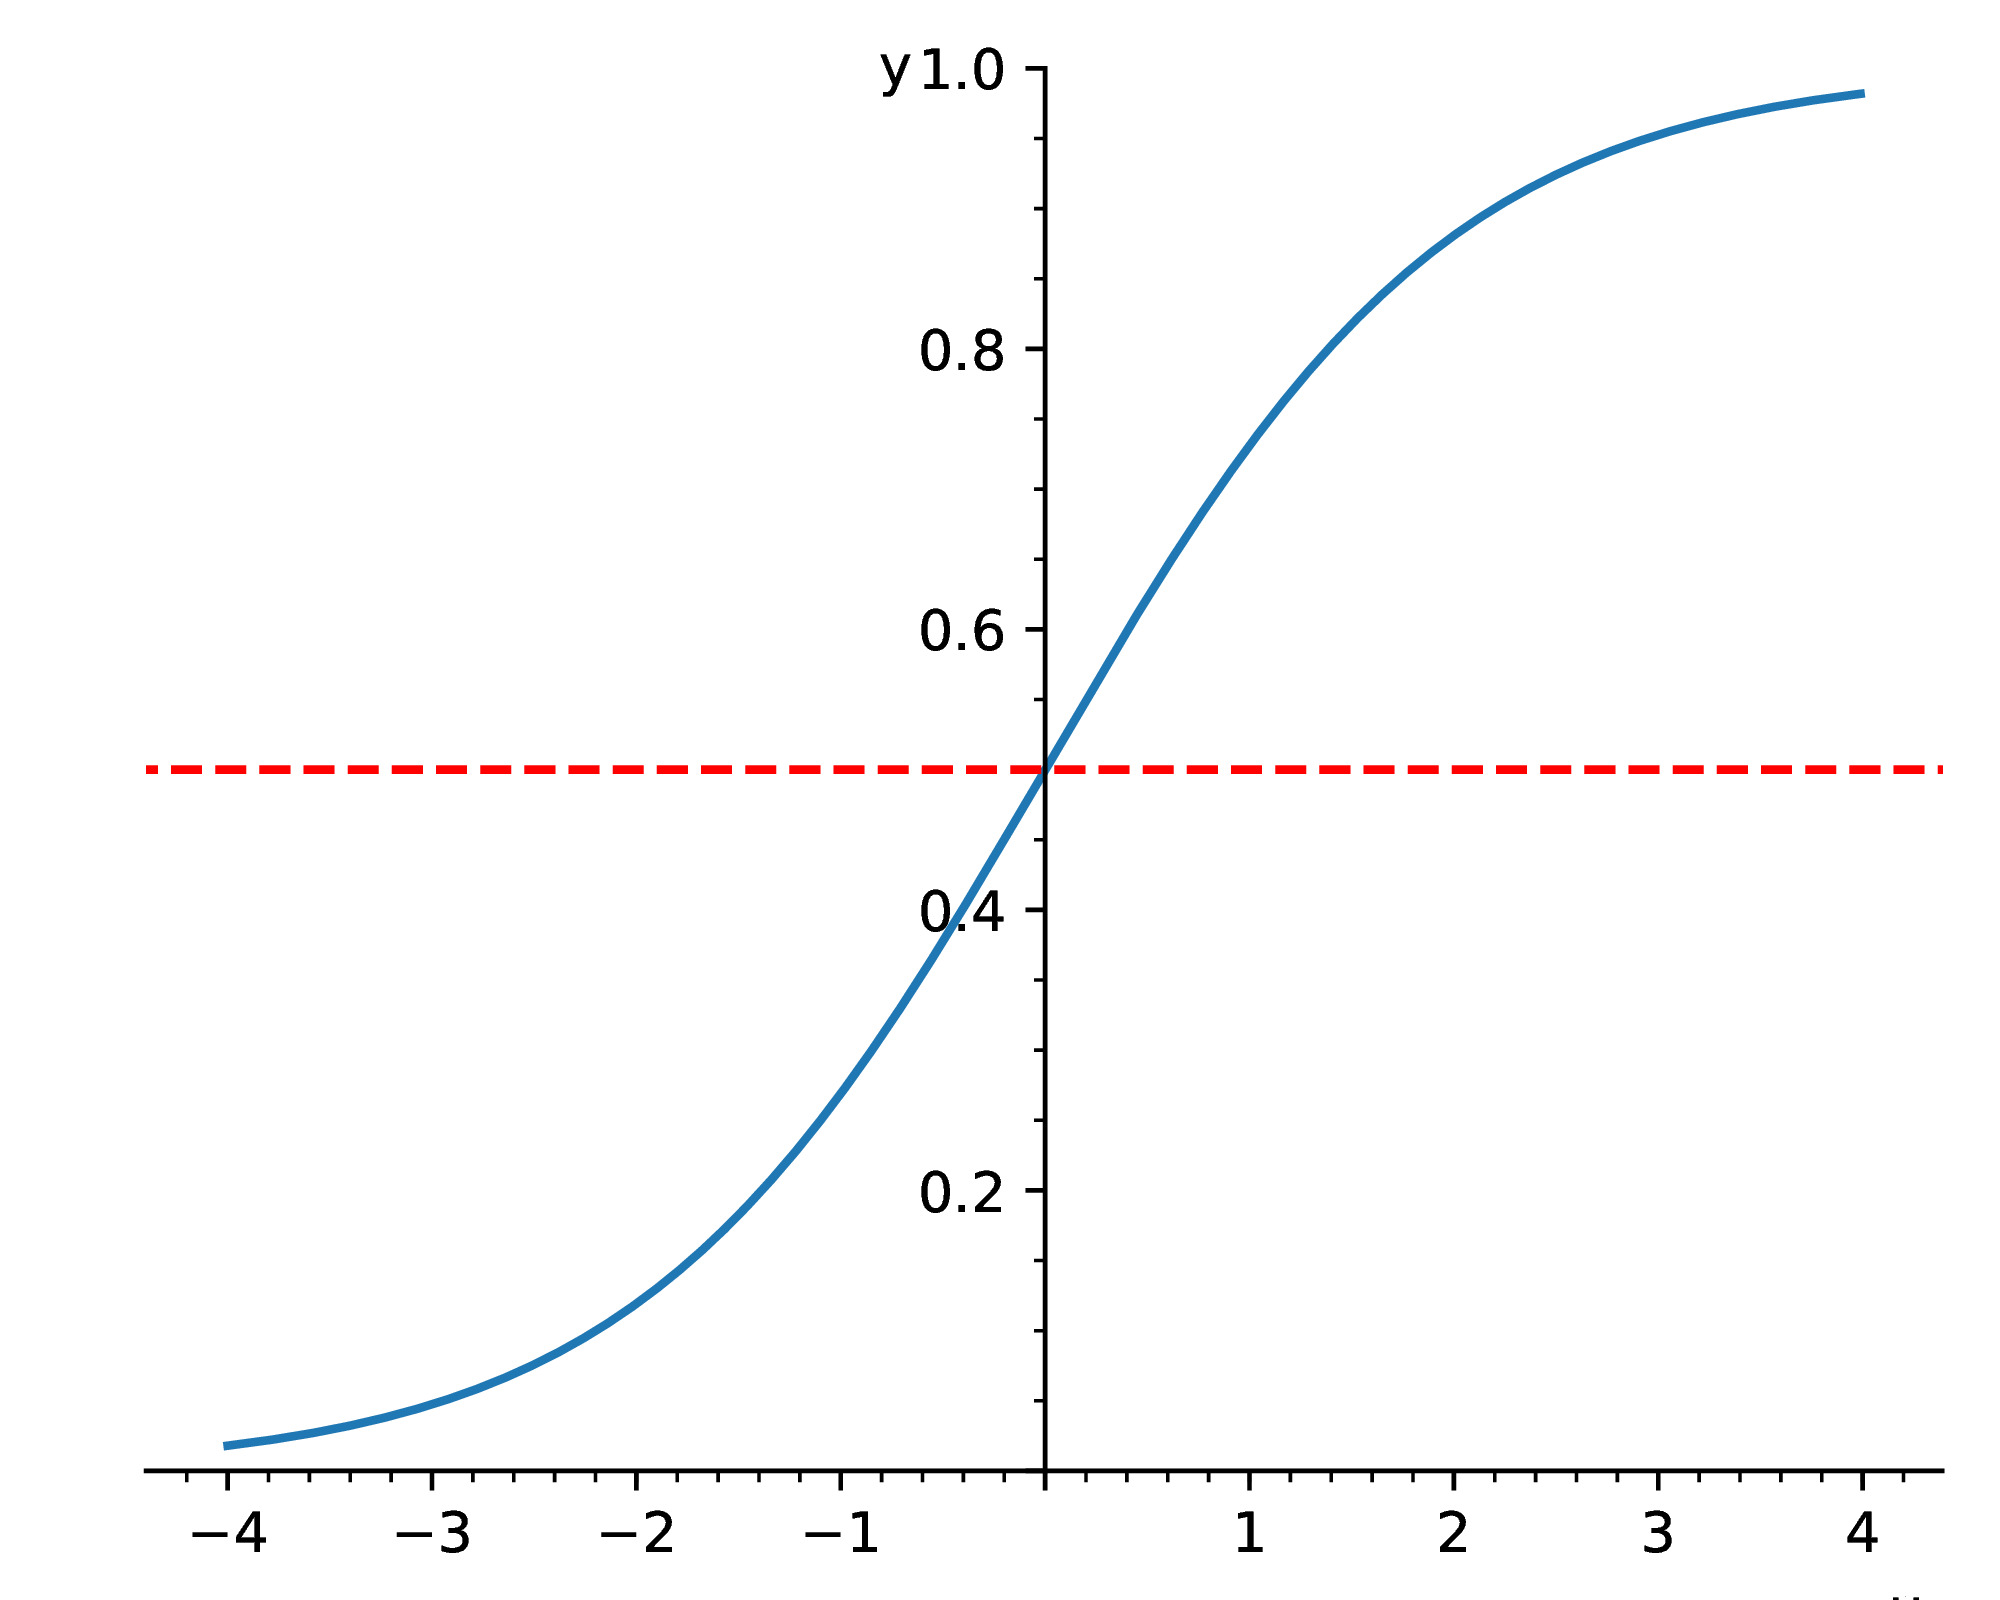



In [ ]:
#@title -- Loading and Preprocessing the Titanic Dataset: X_train, Y_train, X_test, Y_test -- { display-mode: "form" }

# load the CSV
df = pd.read_csv("data/titanic/train.csv")

# split into train and test, stratifying by Survived
df_train, df_test = train_test_split(df, test_size=0.25,
                     stratify=df["Survived"], random_state=4)
# display a small portion of the data
display(df.head())

# determine which columns are to be used and what types they are
categorical_inputs = ["Pclass", "Sex", "Embarked"]
numeric_inputs = ["Age", "SibSp", 'Parch', 'Fare']
output = "Survived"

# create our standard pipeline
input_preproc = make_column_transformer(
    (make_pipeline(
        SimpleImputer(strategy="most_frequent"),
        OrdinalEncoder()),
     categorical_inputs),
    
    (make_pipeline(
        SimpleImputer(),
        StandardScaler()),
     numeric_inputs)
)

# apply preprocessing, making sure that we use method
# transform and not fit_transform for the test set
X_train = input_preproc.fit_transform(df_train[categorical_inputs+numeric_inputs])
Y_train = df_train[output].values.reshape(-1)
X_test = input_preproc.transform(df_test[categorical_inputs+numeric_inputs])
Y_test = df_test[output].values.reshape(-1)

### Tréning modelu



In [ ]:
model = LogisticRegression()
model = model.fit(X_train, Y_train)

### Testovanie modelu

Aplikujeme náš štandardný postup testovania pre kasifikátory.



In [ ]:
#@title -- Testing -- { display-mode: "form" }

# make predictions about the test set
y_test = model.predict(X_test)

# display the confusion matrix
cm = pd.crosstab(Y_test, y_test,
                 rownames=['actual'],
                 colnames=['predicted'])
print(cm)

# compute accuracy
acc = accuracy_score(Y_test, y_test)
print("Accuracy = {}".format(acc))